# Текстовое описание

Датасет с данными о диабете, включённый в библиотеку scikit-learn, является широко используемым набором данных для задач регрессии.

Он содержит информацию о человеке: возраст, пол, индекс массы тела, среднее кровяное давление и шесть измерений сыворотки крови.

Целевая переменная является количественным показателем прогрессирования заболевания через год после исходного уровня, который, по сути, является показателем тяжести или прогрессирования заболевания.

# Основные характеристики датасета

age: Возраст в годах

sex: Пол

bmi: индекс массы тела, показатель жировых отложений, основанный на росте и весе

bp: Среднее кровяное давление

S1: Общий холестерин сыворотки крови

S2: Холестерин липопротеидов низкой плотности (ЛПНП)

S3: Холестерин липопротеидов высокой плотности (ЛПВП)

S4: Соотношение общего холестерина и холестерина ЛПВП

S5: Логарифм уровня триглицеридов в сыворотке крови

S6: Уровень сахара в крови

target: Целевая переменная - Количественный показатель прогрессирования заболевания

# Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [ ]:
diabetes = load_diabetes()
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

# Основные характеристики датасета

In [ ]:
print("Всего строк:", data.shape[0])
print("Всего столбцов:", data.shape[1])

Всего строк: 442
Всего столбцов: 11


In [ ]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# Список колонок с типами данных
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [ ]:
# Пропуски по колонкам
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
bmi - 0
bp - 0
s1 - 0
s2 - 0
s3 - 0
s4 - 0
s5 - 0
s6 - 0
target - 0


In [ ]:
# Основные статистические характеристки набора данных
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Можно заметить, что данные уже масшабированы.

# Визуальное исследование

<Axes: xlabel='bmi', ylabel='target'>

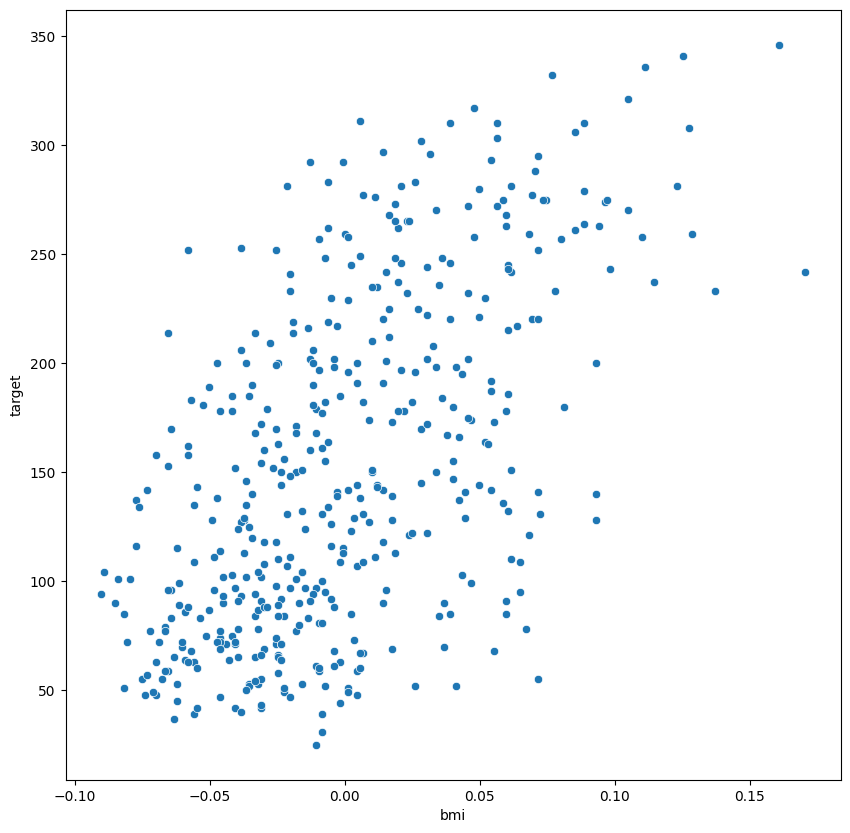

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='bmi', y='target', data=data)

<Figure size 1000x1000 with 0 Axes>

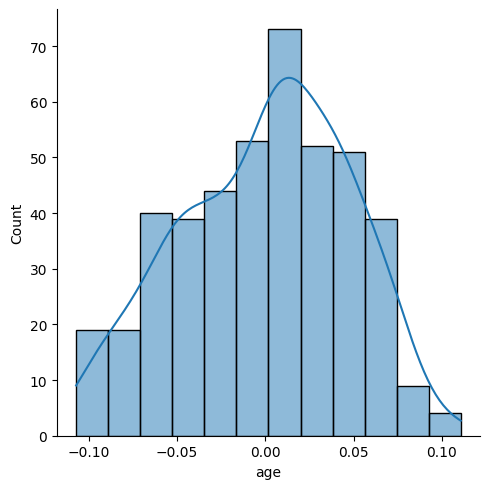

In [ ]:
plt.figure(figsize=(10, 10))
sns.displot(data['age'], kde=True)
plt.show()

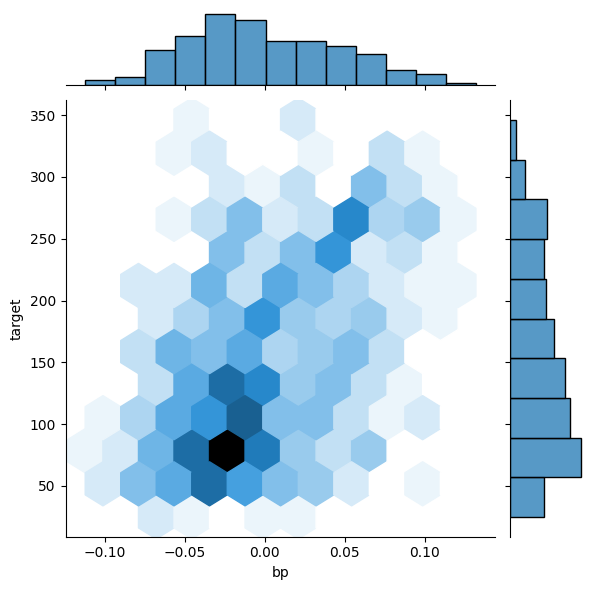

In [ ]:
sns.jointplot(x='bp', y='target', data=data, kind="hex")

In [ ]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.pairplot(data, hue="sex")

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='sex', ylabel='target'>

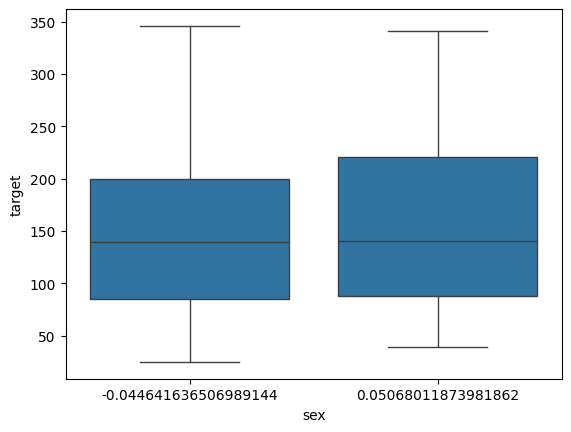

In [ ]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='sex', y='target', data=data)

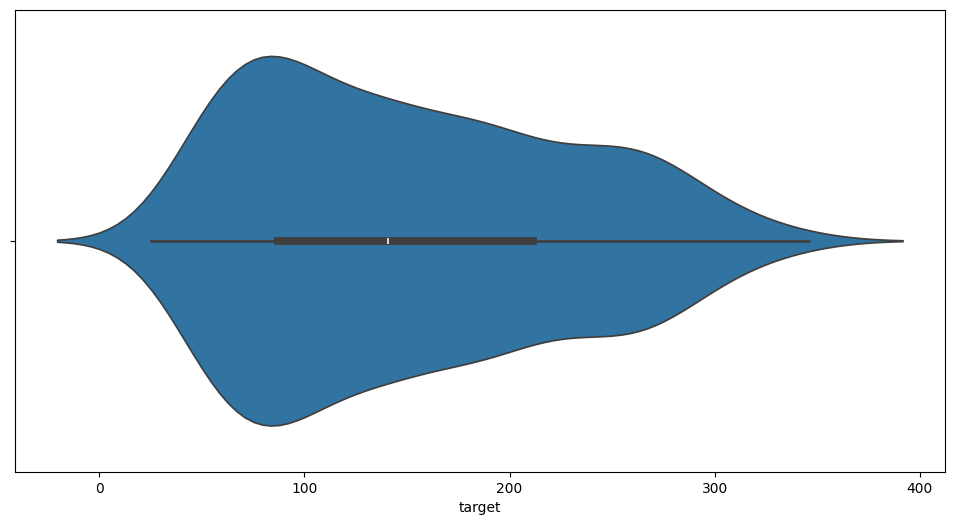

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['target'], density_norm='width')
plt.show()

# Информация о корреляции признаков

In [ ]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

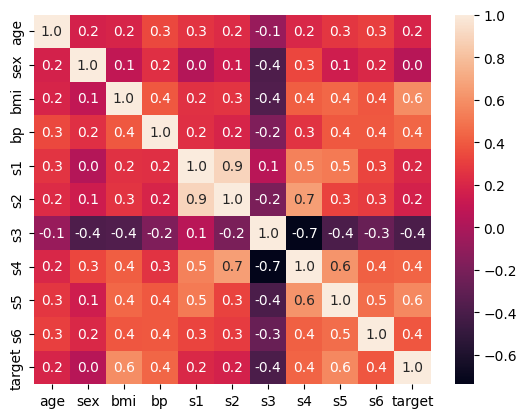

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')